In [15]:
import os
import sys

TOP = '/'.join(os.getcwd().split('/')[:-2])+'/'
LIB = TOP+'lib'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

DAT_DIR = TOP + 'data/reaction/'
FIG_DIR = TOP + 'figs/reaction/'

In [1]:
pwd

'/share/home/ghelman/dev/read_across/applied/predictions/genra-analysis/notebooks/rax'

In [3]:
ls

rax-genra-epa-categories.ipynb         rax-genra-pred-v1c.ipynb
rax-genra-pred-excel.ipynb             rax-genra-study-aggregate.ipynb
rax-genra-pred-filtered-search.ipynb   rax-genra-toxref-data.ipynb
rax-genra-pred-search-expansion.ipynb  rax-genra-toxref-data-mrgn.ipynb
rax-genra-pred-tsca.ipynb              rax-genra-toxref.ipynb
rax-genra-pred-v1a.ipynb               rax-genra-toxref-mrgn.ipynb
rax-genra-pred-v1b.ipynb               Rxn_alerts.ipynb


In [8]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv(DAT_DIR+'rxn_domains.csv')

In [7]:
df.head()

,#,Mech_Domain,Alert,SMARTS_pattern
0,1,Acyl,Acylator,[#6]-[#7]=C=S
1,1,Acyl,Acylator,[#6]-[#7]=C=O
2,1,Acyl,Acylator,[#6]-[#6](=O)-[#8]-[#7]-1-[#6](=O)-[#6]-[#6]-[...
3,1,Acyl,Acylator,"[#6]-[#6](-[F,Cl,Br,I])=O"
4,1,Acyl,Acylator,[C]-[C](=O)-[#8]-[C](-[#6])=O


In [17]:
df = df.set_index('#')

In [61]:
#smarts_dict = {'acyl':{'[#6]-[#7]=C=S','[#6]-[#7]=C=O'}, 'sb':'[#6]-[#6](-[F,Cl,Br,I])=O'}

In [62]:
#smarts_dict

{'acyl': {'[#6]-[#7]=C=O', '[#6]-[#7]=C=S'}, 'sb': '[#6]-[#6](-[F,Cl,Br,I])=O'}

In [11]:
#dow_sm = [Chem.MolFromSmarts(element)for element in df['SMARTS_pattern']]

In [88]:
#smarts = ['[#6]-[#7]=C=O', '[#6]-[#7]=C=S']

In [ ]:
#m = Chem.MolFromSmiles('c1ccccc1O')

In [19]:
def grouper(index):
    floatindex = float(index)
    intindex = int(floatindex)        
    return intindex

In [20]:
smarts_df = df.groupby(grouper)

In [22]:
mech_dict = {}
for i,group in smarts_df:
    key = [name for name in group['Mech_Domain'] if name!=' '][0]
    value = set(group['SMARTS_pattern'])
    mech_dict[key]=value

In [23]:
''''test = {'Acyl': {'O=[#6]-1-[#8]-[#6](=O)-[#6]-2=[#6]-1-[#6]=[#6]-[#6]=[#6]-2',
  'O=[#6]-1-[#8]-[#6](=O)-[#6]=[#6]-1',
  'O=[#6]-1-[#8]-[#6](=O)-c2ccccc-12',
  '[#6]-[#6](-[F,Cl,Br,I])=O',
  '[#6]-[#6](=O)-[#8]-[#7]-1-[#6](=O)-[#6]-[#6]-[#6]-1=O',
  '[#6]-[#6]-1=[#7]-[#6]-[#6](=O)-[#8]-1'}}

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-23-f0cb4c77ddab>, line 6)

In [24]:
#Chem.MolFromSmarts('[#6]-[#6]-1=[#7]-[#6]-[#6](=O)-[#8]-1')

In [25]:
Dow_smarts = {k : [Chem.MolFromSmarts(s) for s in v] for k,v in mech_dict.items()}

In [26]:
#RDkit smarts for the set of reactivity alerts published by Dow. Dictionary of the smarts patterns
Dow_smarts

{'Acyl': [<rdkit.Chem.rdchem.Mol at 0x7f72d9850e90>,
 'MA': [<rdkit.Chem.rdchem.Mol at 0x7f72d9868350>,
 'SB': [<rdkit.Chem.rdchem.Mol at 0x7f72d9868da0>,
 'SN2': [<rdkit.Chem.rdchem.Mol at 0x7f72d9868ee0>,
 'SNAR': [<rdkit.Chem.rdchem.Mol at 0x7f72d9868940>,
  <rdkit.Chem.rdchem.Mol at 0x7f72d9868d50>]}

In [27]:
# Test file from the Dow supplementary file of ~162 smiles
''''rxn_smi = pd.read_csv('rxn_smi.csv')

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-27-c8e02b8d5c55>, line 2)

In [28]:
#smaller subset of about 16 smiles strings as a test set to try out on the SMARTS patterns
''''dows = pd.read_csv('dows.csv')

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-28-f982c28df76c>, line 2)

In [29]:
#dows

In [19]:
#smi_dict = { k:v for (k,v) in zip(rxn_smi['CAS_Number'], rxn_smi['SMILES'])}

In [103]:
#smi_smiles = {k : Chem.MolFromSmiles(v) for k,v in smi_dict.items()}

In [28]:
#dow_dict = { k:v for (k,v) in zip(dows['DTXSID'], dows['SMILES'])}

In [29]:
#dow_dict

{'DTXSID8024658': 'BrCC1=CC=CC=C1',
 'DTXSID6024466': 'NC1=CC=C(C=C1)C(O)=O',
 'DTXSID7044841': 'CC(=C)C(=O)OCC(O)COC1=CC=C(C=C1)C(C)(C)C1=CC=C(OCC(O)COC(=O)C(C)=C)C=C1',
 'DTXSID0026838': 'CCCCCCCCCCCCCC(=O)OC(C)C',
 'DTXSID6020145': 'O=C1C=CC(=O)C=C1',
 'DTXSID0024183': 'COC(=O)C=C',
 'DTXSID2034259': 'CN1SC=CC1=O',
 'DTXSID3060372': 'CC(=O)C(=O)C1=CC=CC=C1',
 'DTXSID4025662': 'CC(=O)C=CC1=CC=CC=C1',
 'DTXSID5021968': 'CCOC1=C(O)C=CC(C=O)=C1',
 'DTXSID9026053': 'OS(O)(=O)=O.OS(O)(=O)=O.OS(O)(=O)=O.CN[C@H]1[C@H](O)[C@@H](O)[C@H](CO)O[C@H]1O[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@H](NC(N)=N)[C@@H](O)[C@@H]2NC(N)=N)O[C@@H](C)[C@]1(O)C=O.CN[C@H]1[C@H](O)[C@@H](O)[C@H](CO)O[C@H]1O[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@H](NC(N)=N)[C@@H](O)[C@@H]2NC(N)=N)O[C@@H](C)[C@]1(O)C=O',
 'DTXSID7025138': 'CN(C)C1=CC=C(C=C1)N=O',
 'DTXSID6024676': 'CCCCOC(=O)C=C',
 'DTXSID0020319': 'ClC1=C(Cl)C(C#N)=C(Cl)C(C#N)=C1Cl',
 'DTXSID3021807': 'CC1=C(C)C=CC=C1',
 'DTXSID5021251': 'O=C1NS(=O)(=O)C2=C1C=CC=C2',

In [143]:
#m = Chem.MolFromSmiles('BrCC1=CC=CC=C1')

In [146]:
#Chem.MolToSmiles(m)

'BrCc1ccccc1'

In [148]:
#conv = {k : Chem.MolToSmiles(v) for k,v in Dow_smiles.items()}

In [149]:
#conv

{'DTXSID8024658': 'BrCc1ccccc1',
 'DTXSID6024466': 'Nc1ccc(C(=O)O)cc1',
 'DTXSID7044841': 'C=C(C)C(=O)OCC(O)COc1ccc(C(C)(C)c2ccc(OCC(O)COC(=O)C(=C)C)cc2)cc1',
 'DTXSID0026838': 'CCCCCCCCCCCCCC(=O)OC(C)C',
 'DTXSID6020145': 'O=C1C=CC(=O)C=C1',
 'DTXSID0024183': 'C=CC(=O)OC',
 'DTXSID2034259': 'Cn1sccc1=O',
 'DTXSID3060372': 'CC(=O)C(=O)c1ccccc1',
 'DTXSID4025662': 'CC(=O)C=Cc1ccccc1',
 'DTXSID5021968': 'CCOc1cc(C=O)ccc1O',
 'DTXSID9026053': 'CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@@H](NC(=N)N)[C@H](O)[C@@H](NC(=N)N)[C@H](O)[C@H]3O)O[C@@H](C)[C@]2(O)C=O)O[C@@H](CO)[C@H](O)[C@H]1O.CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@@H](NC(=N)N)[C@H](O)[C@@H](NC(=N)N)[C@H](O)[C@H]3O)O[C@@H](C)[C@]2(O)C=O)O[C@@H](CO)[C@H](O)[C@H]1O.O=S(=O)(O)O.O=S(=O)(O)O.O=S(=O)(O)O',
 'DTXSID7025138': 'CN(C)c1ccc(N=O)cc1',
 'DTXSID6024676': 'C=CC(=O)OCCCC',
 'DTXSID0020319': 'N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl',
 'DTXSID3021807': 'Cc1ccccc1C',
 'DTXSID5021251': 'O=C1NS(=O)(=O)c2ccccc21',
 'DTXSID9049326': 'COC(=O)C(C)=O'}

In [87]:
#Dow_smiles = {k : Chem.MolFromSmiles(v) for k,v in dow_dict.items()}

In [88]:
#Dictionary of the Dow small test file to test out against the Dow reaction alerts
#Dow_smiles


{'DTXSID8024658': <rdkit.Chem.rdchem.Mol at 0x7f82ac3253a0>,
 'DTXSID6024466': <rdkit.Chem.rdchem.Mol at 0x7f82ac325440>,
 'DTXSID7044841': <rdkit.Chem.rdchem.Mol at 0x7f82ac325490>,
 'DTXSID0026838': <rdkit.Chem.rdchem.Mol at 0x7f82ac3254e0>,
 'DTXSID6020145': <rdkit.Chem.rdchem.Mol at 0x7f82ac325350>,
 'DTXSID0024183': <rdkit.Chem.rdchem.Mol at 0x7f82ac325530>,
 'DTXSID2034259': <rdkit.Chem.rdchem.Mol at 0x7f82ac325580>,
 'DTXSID3060372': <rdkit.Chem.rdchem.Mol at 0x7f82ac3255d0>,
 'DTXSID4025662': <rdkit.Chem.rdchem.Mol at 0x7f82ac325620>,
 'DTXSID5021968': <rdkit.Chem.rdchem.Mol at 0x7f82ac3256c0>,
 'DTXSID9026053': <rdkit.Chem.rdchem.Mol at 0x7f82ac325710>,
 'DTXSID7025138': <rdkit.Chem.rdchem.Mol at 0x7f82ac325760>,
 'DTXSID6024676': <rdkit.Chem.rdchem.Mol at 0x7f82ac3257b0>,
 'DTXSID0020319': <rdkit.Chem.rdchem.Mol at 0x7f82ac325800>,
 'DTXSID3021807': <rdkit.Chem.rdchem.Mol at 0x7f82ac325850>,
 'DTXSID5021251': <rdkit.Chem.rdchem.Mol at 0x7f82ac3258a0>,
 'DTXSID9049326': <rdkit

In [34]:
#a = list(map(lambda e:Chem.MolFromSmiles(e), dow_dict.values()))

In [31]:
#Large test file of 500 substances
niceatm = pd.read_csv(DAT_DIR+'NICEATM_LLNA.csv')

FileNotFoundError: File b'NICEATM_LLNA.csv' does not exist

In [30]:
niceatm.head()

NameError: name 'niceatm' is not defined

In [16]:
#Dictionary of the niceatm chemicals
niceatm_dict = { k:v for (k,v) in zip(niceatm['DTXSID'], niceatm['SMILES'])}

In [17]:
#niceatm rdkit dictionary
niceatm_smiles = {k : Chem.MolFromSmiles(v) for k,v in niceatm_dict.items()}

In [190]:
#{x:[k for k, v in Dow_smarts.items() if any([x.HasSubstructMatch(e) for e in v])] for x in niceatm_smiles.values()}

{<rdkit.Chem.rdchem.Mol at 0x7f82ac2d6d50>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac2d6bc0>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac2d6e40>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac2d6e90>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac2d6ee0>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac2d6f80>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e030>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e080>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e0d0>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e120>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e170>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e1c0>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e210>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e260>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e2b0>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e300>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e350>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e3a0>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e3f0>: [],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac25e440>: ['SN2'],
 <rdkit.Chem.rdchem.Mol at 0x7f82ac

In [18]:
niceatm_Dow = {x:[k for k, v in Dow_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in niceatm_smiles.items()}

In [19]:
niceatm_Enoch = {x:[k for k, v in enoch_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in niceatm_smiles.items()}

NameError: name 'enoch_smarts' is not defined

In [20]:
niceatm_OECD = {x:[k for k, v in oecd_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in niceatm_smiles.items()}

NameError: name 'oecd_smarts' is not defined

In [170]:
#chk = {k : Chem.MolToSmiles(k) for k,v in niceatm_Dow.items()}

In [195]:
#pd.DataFrame.from_dict([chk]).T.to_csv('chk_smiles.csv')
pd.DataFrame.from_dict([niceatm_Dow]).T.to_csv('niceatm_Dow.csv')
pd.DataFrame.from_dict([niceatm_Enoch]).T.to_csv('niceatm_Enoch.csv')
pd.DataFrame.from_dict([niceatm_OECD]).T.to_csv('niceatm_OECD.csv')


In [172]:
pd.DataFrame.from_dict([niceatm_smiles]).T.to_csv('niceatm_smiles.csv')

In [140]:
#d2 = {x:[k for k, v in Dow_smarts.items() if any([x.HasSubstructMatch(e) for e in v])] for x in Dow_smiles.values()}

In [107]:
#len(d2)

17

In [37]:
#dsm  = [Chem.MolFromSmiles(element)for element in dows['SMILES']]

In [38]:
#d3 = {x:[k for k, v in Dow_smarts.items() if any([x.HasSubstructMatch(e) for e in v])] for x in dsm}

In [136]:
#d3 = {x:[k for k, v in Dow_smarts.items() if any([x.HasSubstructMatch(e) for e in v])] for x in smi_smiles.values()}

In [127]:
#pd.DataFrame.from_dict([smi_smiles]).T.to_csv('smi_smiles.csv')

In [106]:
#len(d3)

162

In [151]:
#chems = Chem.SDMolSupplier('1295.sdf')

In [154]:
#dd = {mol:[k for k, v in Dow_smarts.items() if any([mol.HasSubstructMatch(e) for e in v])] for mol in chems}

In [155]:
#len(dd)

1295

In [34]:
enoch = pd.read_csv(DAT_DIR+'Enoch.csv')

In [35]:
enoch.head()

,#,Mech,SMARTS
0,1,SNAR,"c1([F,Cl,Br,I,$(N(=O)~O)])c([F,Cl,Br,I,$(N(=O)..."
1,1,SNAR,"c1([F,Cl,Br,I,$(N(=O)~O)])c([F,Cl,Br,I,$(N(=O)..."
2,1,SNAR,"c1([F,Cl,Br,I,$(N(=O)~O)])ncc([F,Cl,Br,I,$(N(=..."
3,1,SNAR,"c1([F,Cl,Br,I,$(N(=O)~O)])ncccc1([F,Cl,Br,I,$(..."
4,1,SNAR,"c1([F,Cl,Br,I,$(N(=O)~O)])ncccn1"


In [36]:
enoch_df = enoch.set_index('#')

In [37]:
enoch_df = enoch_df.groupby(grouper)

In [38]:
enoch_dict = {}
for i,group in enoch_df:
    key = [name for name in group['Mech'] if name!=' '][0]
    value = set(group['SMARTS'])
    enoch_dict[key]=value

In [39]:
enoch_smarts = {k : [Chem.MolFromSmarts(s) for s in v] for k,v in enoch_dict.items()}

In [40]:
#d5 = {x:[k for k, v in enoch_smarts.items() if any([x.HasSubstructMatch(e) for e in v])] for x in Dow_smiles.values()}

In [41]:
#d6 = {x:[k for k, v in enoch_smarts.items() if any([x.HasSubstructMatch(e) for e in v])] for x in smi_smiles.values()}

In [42]:
#d_6 = pd.DataFrame.from_dict([d6]).T.to_csv('d6_enoch_smarts.csv')

In [43]:
{k:len(v) for k,v in enoch_dict.items()}

{'Acyl': 9, 'MA': 26, 'SB': 14, 'SN2': 9, 'SNAR': 8}

In [44]:
{k:len(v) for k,v in enoch_dict.items()}
{k:len(v) for k,v in mech_dict.items()}

{'Acyl': 9, 'MA': 26, 'SB': 14, 'SN2': 9, 'SNAR': 8}

{'Acyl': 11, 'MA': 19, 'SB': 4, 'SN2': 23, 'SNAR': 14}

In [47]:
enoch_crt = pd.read_csv(DAT_DIR+'Enoch_CRT.csv')

In [48]:
enoch_crt_df = enoch_crt.set_index('#')

In [49]:
enoch_crt = enoch_crt_df.groupby(grouper)

In [50]:
crt_dict = {}
for i,group in enoch_crt:
    key = [name for name in group['Mech'] if name!=' '][0]
    value = set(group['SMARTS'])
    crt_dict[key]=value

In [51]:
crt_dict

{'Acyl': {' [#6,#1]C(=[O,SX2])[O,SX2,NX3][$([a;r6]),$([a;r5]),$(C([O,SX2,NX3])=C),$(C([O,SX2,NX3])#C)] ',
  'C([#6,#1])([#6,#1])=C=O',
  'C1([#6,#1])=C([#6,#1])C1(=O)',
  'C1=[O,SX2,NX2,CX3]CC(=[O,SX2])[O,SX2,NX3]1 ',
  'C1C(=O)NC1',
  'C1C(=O)OC1',
  'C1C(=O)SC1',
  'N([#6])([#6])C(=O)[F,Cl,Br,I] ',
  '[#6,#1]C(=O)[F,Cl,Br,I] ',
  '[#6,#1]N=C=O ',
  '[#6,#1]N=C=S',
  '[#6,#1]S(=O)(=O)[F,Cl,Br,I,$(C#N)] ',
  '[#6]1[#6]C(=O)[O,SX2]C1(=O)',
  '[#6]N=C(S[#6])S[#6]',
  '[#6]N=C=N[#6]',
  '[#6]OP(=O)(O[#6])[F,Cl,Br,I,$(C#N)] ',
  '[#6][C;!R](=O)[$([O,S]([C;!R](=O)[#6])C(=O)[#6])]'},
 'MA': {'O=C1[NH,$(N(C=O)(C=O)[#6])]C(=O)[CH,$(C(C=O)(=C)[#6])]=[CH]1',
  '[#6,#1]C#CC#N',
  '[#6,#1]C#CC(=O)O[#6]',
  '[#6,#1]C#CC(=O)[#6]',
  '[#6,#1]C#CC(=O)[$([NH2]),$([NH](C=O)[#6]),$(N(C=O)([#6])[#6])]',
  '[#6,#1]C#CS(=O)(=O)O[#6]',
  '[#6,#1]C#CS(=O)(=O)[#6]',
  '[#6,#1]C#C[$(c1ncccc1),$(c1ccncc1),$(c1nccnc1),$(c1ncccn1),$(c1cncnc1),$(c1ncncc1),$(c1ncncn1),$(c1nncnc1),$(c1nnccn1),$(c1cnncn1)]',
  '[#6,#1

In [52]:
oecd_smarts = {k : [Chem.MolFromSmarts(s) for s in v] for k,v in crt_dict.items()}

In [53]:
crt_len = {k:len(v) for k,v in crt_dict.items()}

In [54]:
crt_len

{'Acyl': 17, 'MA': 34, 'SB': 11, 'SN2': 39, 'SNAr': 1}

In [55]:
enoch_len = {k:len(v) for k,v in enoch_dict.items()}
dow_len = {k:len(v) for k,v in mech_dict.items()}

In [56]:
counts = pd.read_csv(DAT_DIR+'counts_mech.csv')

FileNotFoundError: File b'counts_mech.csv' does not exist

In [39]:
counts

,Unnamed: 0,#Enoch_Patterns,#OECD_Patterns,#Dow_Patterns
0,Acyl,9,17,11
1,MA,26,34,19
2,SB,14,11,4
3,SN2,9,39,23
4,SNAR,8,1,14


In [40]:
counts.rename(columns = {'Unnamed: 0':'Mech'}, inplace = True)

In [41]:
counts

,Mech,#Enoch_Patterns,#OECD_Patterns,#Dow_Patterns
0,Acyl,9,17,11
1,MA,26,34,19
2,SB,14,11,4
3,SN2,9,39,23
4,SNAR,8,1,14


In [57]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,15), sharey = True)


sns.barplot(x = '#Enoch_Patterns', y = 'Mech', color = 'b',label = "Enoch_alerts", data = counts, ax=ax1)
sns.barplot(x = '#OECD_Patterns', y = 'Mech', color = 'g',label = "OECD_Protein_binding_alerts", data = counts, ax = ax2)
sns.barplot(x = '#Dow_Patterns', y = 'Mech', color = 'y',label = "Dow_rxn_alerts", data = counts, ax= ax3)
ax1.set_ylabel('Mech')
ax2.set_ylabel('')
ax3.set_ylabel('')


ax1.set_xlabel('Enoch_alerts')
ax2.set_xlabel('OECD_Protein_binding_alerts')
ax3.set_xlabel('Dow_rxn_alerts')

ax1.set(xlim=(0,40))
ax2.set(xlim=(0,40))
ax3.set(xlim=(0,40))

NameError: name 'plt' is not defined

In [126]:
''''pd.DataFrame.from_dict([crt_len]).T.to_csv('crt_len.csv')
pd.DataFrame.from_dict([enoch_len]).T.to_csv('enoch_len.csv')
pd.DataFrame.from_dict([dow_len]).T.to_csv('dow_len.csv')

In [115]:
#d8 = {x:[k for k, v in oecd_smarts.items() if any([x.HasSubstructMatch(e) for e in v])] for x in Dow_smiles.values()}

In [116]:
#d9 = {x:[k for k, v in oecd_smarts.items() if any([x.HasSubstructMatch(e) for e in v])] for x in smi_smiles.values()}

In [121]:
#d_9 = pd.DataFrame.from_dict([d3]).T.to_csv('d9_OECD_smarts.csv')

In [42]:
comparisons = pd.read_csv('mech-cat.csv')

In [43]:
comparisons.head()

,DTXSID,CASRN,SMILES,Activity,OECD,Enoch,Dow
0,DTXSID00148597,1086-00-6,ClCC1=C2C=CC3=CC=CC4=C3C2=C(C=C1)C=C4,1,['SN2'],['SN2'],['SN2']
1,DTXSID00178814,24085-08-3,Cl.CC(C)(C)N(CC(=O)C1=CC(CO)=C(O)C=C1)CC1=CC=C...,1,[],[],[]
2,DTXSID0020319,1897-45-6,ClC1=C(Cl)C(C#N)=C(Cl)C(C#N)=C1Cl,1,[],['SNAR'],[]
3,DTXSID0020575,140-67-0,COC1=CC=C(CC=C)C=C1,1,[],['MA'],[]
4,DTXSID0021206,57-55-6,CC(O)CO,0,[],[],[]


In [44]:
jrc = pd.read_csv(DAT_DIR+'JRC.csv')

In [45]:
jrc.head()

,DTXSID,CASRN,SMILES,reaction_chemistry_domain,LLNA,DPRA,KeratinoSens,hCLAT
0,DTXSID1031626,1896-62-4,CC(=O)\C=C\C1=CC=CC=C1,MA,1,1.0,1,1.0
1,DTXSID4051879,2277-19-2,CC\C=C/CCCCC=O,SB,1,0.0,1,NaN
2,DTXSID00231670,82297-64-1,CCC(=O)\C=C\C1=CC=C(OC)C=C1,MA,1,1.0,1,NaN
3,DTXSID7049398,116-26-7,CC1=C(C=O)C(C)(C)CC=C1,MA,1,1.0,1,NaN
4,DTXSID7026235,552-30-7,OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1,Acyl,1,1.0,0,1.0


In [46]:
#Dictionary of the jrc chemicals
jrc_dict = { k:v for (k,v) in zip(jrc['DTXSID'], jrc['SMILES'])}

In [48]:
#jrc rdkit dictionary
jrc_smiles = {k : Chem.MolFromSmiles(v) for k,v in jrc_dict.items()}

In [49]:
jrc_Dow = {x:[k for k, v in Dow_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in jrc_smiles.items()}

In [50]:
jrc_Enoch = {x:[k for k, v in enoch_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in jrc_smiles.items()}

In [51]:
jrc_OECD = {x:[k for k, v in oecd_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in jrc_smiles.items()}

In [259]:
pd.DataFrame.from_dict([jrc_Dow]).T.to_csv('jrc_Dow.csv')

In [260]:
pd.DataFrame.from_dict([jrc_Enoch]).T.to_csv('jrc_Enoch.csv')

In [261]:
pd.DataFrame.from_dict([jrc_OECD]).T.to_csv('jrc_OECD.csv')

In [246]:
jrc_all = pd.read_csv('jrc_allpred_merged.csv')

In [302]:
jrc_all.head()

,DTXSID,CASRN,SMILES,reaction_chemistry_domain,Expert_Mech,OECD,Enoch,Dow,LLNA,DPRA,KeratinoSens,hCLAT
0,DTXSID1031626,1896-62-4,CC(=O)\C=C\C1=CC=CC=C1,MA,['MA'],"['MA', 'SN2']",['MA'],['MA'],1,1.0,1,1.0
1,DTXSID4051879,2277-19-2,CC\C=C/CCCCC=O,SB,['SB'],['SB'],['SB'],['SB'],1,0.0,1,NaN
2,DTXSID00231670,82297-64-1,CCC(=O)\C=C\C1=CC=C(OC)C=C1,MA,['MA'],"['MA', 'SN2']",['MA'],['MA'],1,1.0,1,NaN
3,DTXSID7049398,116-26-7,CC1=C(C=O)C(C)(C)CC=C1,MA,['MA'],[],"['MA', 'SB']",['SB'],1,1.0,1,NaN
4,DTXSID7026235,552-30-7,OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1,Acyl,['Acyl'],['Acyl'],['Acyl'],['Acyl'],1,1.0,0,1.0


In [249]:
jrc_all['OECD'] = jrc_all['OECD'].str.replace(r"\['SNAr']", "['SNAR']")

In [250]:
jrc_all['Expert_Mech'] = jrc_all['Expert_Mech'].str.replace(r"\['SNAr']", "['SNAR']")

In [254]:
jrc_all['Enoch'] = jrc_all['Enoch'].str.replace(r"\['SB', 'MA']", "['MA', 'SB']")

In [267]:
jrc_all['Expert_Mech'] = jrc_all['Expert_Mech'].str.replace(r"\['Acyl','MA', ]", "['Acyl', 'MA']")

In [436]:
jrc_all['Expert_Mech'].unique()

array(["['MA']", "['SB']", "['Acyl']", "['SN2']", '[]', "['MA', 'SB']",
       "['SNAR']", "['Acyl', 'pre']", "['pre']", "['Special_case']",
       "['MA', 'SN2', 'pre']", "['SN2', 'pre']", "['pro', 'pre']",
       "['Acyl', 'MA']", "['MA','SN1']"], dtype=object)

In [438]:
jrc_all['Enoch'].unique()

array(["['MA']", "['SB']", "['MA', 'SB']", "['Acyl']", '[]', "['SN2']",
       "['SNAR']", "['MA', 'SN2']", "['SB', 'Acyl']", "['MA', 'Acyl']",
       "['SNAR', 'Acyl']"], dtype=object)

In [268]:
from sklearn.metrics import confusion_matrix

In [269]:
cm = confusion_matrix(jrc_all['Expert_Mech'],jrc_all['Enoch'])

In [270]:
print(cm)

[[ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  2  0  1  0 43  0  1  0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  1  1  0  0 20  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0

In [293]:
cm_df = pd.DataFrame(cm, index = mycols, columns = mycols)

In [423]:
cm_df.to_csv('Expert_Enoch_CM.csv')

In [264]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [437]:
#show the classification report 
print(classification_report(jrc_all['Expert_Mech'],jrc_all['Enoch']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       0.00      0.00      0.00         1
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.61      0.79      0.69        14
      ['MA', 'Acyl']       0.00      0.00      0.00         0
        ['MA', 'SB']       0.25      0.17      0.20         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
       ['MA', 'SN2']       0.00      0.00      0.00         0
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.88      0.83      0.85        52
      ['SB', 'Acyl']       0.00      0.00      0.00         0
              ['SB']       0.76      0.76      0.76        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       1.00      0.62      0.77        32
    ['SNAR', 'Acyl']       0.00      0.00      0.00         0
            ['SNAR']       1.00      1.00      1.00         6
    ['S

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [283]:
# parse out the first column as whole object is str
report_data = []
lines = report.split('\n')
for line in lines[2:-3]:
    row = {}
    row_data = line.split("    ")
    row_data = list(filter(None,row_data))
    row['class'] = row_data[0]
    report_data.append(row)
mycmdf = pd.DataFrame.from_dict(report_data)



In [284]:
mycmdt = mycmdf.T


In [285]:
mycols = list(mycmdt.iloc[0])

In [287]:
len(mycols)

19

In [215]:
''''def cm_formating(report):
    report_data = []
lines = report.split('\n')
for line in lines[2:-3]:
    row = {}
    row_data = line.split("    ")
    row_data = list(filter(None,row_data))
    row['class'] = row_data[0]
    report_data.append(row)
df_3 = pd.DataFrame.from_dict(report_data)


In [288]:
report = classification_report(jrc_all['Expert_Mech'],jrc_all['Enoch'])

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [289]:
clf_rep = precision_recall_fscore_support(jrc_all['Expert_Mech'],jrc_all['Enoch'])

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [381]:
#from scipy import stats

In [290]:
#out_dict = {'precision' : clf_rep[0].round(2),'recall': clf_rep[1].round(2),'f1_score': clf_rep[2].round(2),'support':clf_rep[3]}

In [395]:
#out_df = pd.DataFrame.from_dict(out_dict)

In [ ]:
#github.com/scikit-learn/scikit-learn/issues/7845

In [422]:
''''avg_tot = out_df.apply(lambda x: round(get_harmonic_mean(x),2) if x.item != 0 else round(x.sum(),2)).to_frame().T
avg_tot.index=['avg/total']
out_df = out_df.append(avg_tot)
print(out_df)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-422-460b603da997>, line 4)

In [417]:
''''def get_harmonic_mean(my_list):
    sum = 0.0
    for i in my_list:
        sum += 1/i
    return len(my_list)/sum
print (get_harmonic_mean([3,3,4]))

3.272727272727273


In [308]:
avg_tot = list(precision_recall_fscore_support(jrc_all['Expert_Mech'], jrc_all['Enoch'], average = 'weighted'))

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [314]:
out_df = pd.DataFrame.from_dict(out_dict)


In [379]:
report_data = []
lines = report.split('\n')
for line in lines[2:-3]:
    row = {}
    row_data = line.split("    ")
    row_data = list(filter(None,row_data))
    row['class'] = row_data[0]
    row['precision'] = float(row_data[1])
    row['recall'] = float(row_data[2])
    row['f1_score'] = float(row_data[3])
    row['support'] = float(row_data[4])
    report_data.append(row)
test = pd.DataFrame.from_dict(report_data)


In [424]:
test.to_csv('Expert_Enoch_Classification_Report.csv')


In [373]:
test['support'].sum()

222.0

In [374]:
avg = list(precision_recall_fscore_support(jrc_all['Expert_Mech'], jrc_all['Enoch'], average = 'weighted'))

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [372]:
test.append(avg.append(total))

,class,f1_score,precision,recall,support
0,"['Acyl', 'MA']",0.00,0.00,0.00,1.0
1,"['Acyl', 'pre']",0.00,0.00,0.00,1.0
2,['Acyl'],0.69,0.61,0.79,14.0
3,"['MA', 'Acyl']",0.00,0.00,0.00,0.0
4,"['MA', 'SB']",0.20,0.25,0.17,6.0
5,"['MA', 'SN2', 'pre']",0.00,0.00,0.00,1.0
6,"['MA', 'SN2']",0.00,0.00,0.00,0.0
7,"['MA','SN1']",0.00,0.00,0.00,1.0
8,['MA'],0.85,0.88,0.83,52.0
9,"['SB', 'Acyl']",0.00,0.00,0.00,0.0


Text(0.5,14.0938,'Enoch')

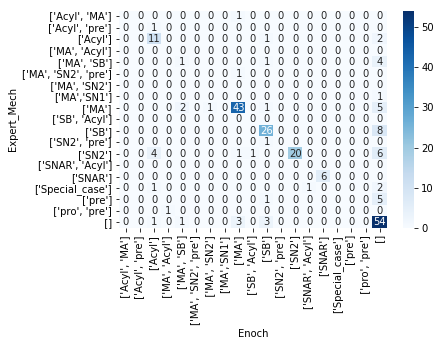

In [303]:
ax = sns.heatmap(cm_df, annot = True, yticklabels = True, xticklabels = True, cmap = 'Blues')
ax.set_ylabel("Expert_Mech")
ax.set_xlabel('Enoch')

In [304]:
jrc_all.head()

,DTXSID,CASRN,SMILES,reaction_chemistry_domain,Expert_Mech,OECD,Enoch,Dow,LLNA,DPRA,KeratinoSens,hCLAT
0,DTXSID1031626,1896-62-4,CC(=O)\C=C\C1=CC=CC=C1,MA,['MA'],"['MA', 'SN2']",['MA'],['MA'],1,1.0,1,1.0
1,DTXSID4051879,2277-19-2,CC\C=C/CCCCC=O,SB,['SB'],['SB'],['SB'],['SB'],1,0.0,1,NaN
2,DTXSID00231670,82297-64-1,CCC(=O)\C=C\C1=CC=C(OC)C=C1,MA,['MA'],"['MA', 'SN2']",['MA'],['MA'],1,1.0,1,NaN
3,DTXSID7049398,116-26-7,CC1=C(C=O)C(C)(C)CC=C1,MA,['MA'],[],"['MA', 'SB']",['SB'],1,1.0,1,NaN
4,DTXSID7026235,552-30-7,OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1,Acyl,['Acyl'],['Acyl'],['Acyl'],['Acyl'],1,1.0,0,1.0


In [430]:
confusion_matrix(jrc_all['Expert_Mech'],jrc_all['OECD'])

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  0,  0,
         2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,
         3],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1],
       [ 0,  0,  0,  0,  0,  0,  6,  0, 34,  1,  0,  1,  0,  0,  0,  0,
        10],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,
        13],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, 27,  0,  0,  

In [429]:
len(cm_em_tbx)

17

In [457]:
cmemtbx_df = pd.DataFrame(cm_em_tbx, index = em_oecd_cols, columns = em_oecd_cols)

In [471]:
cmemtbx_df.to_csv('Expert_OECD_CM.csv')

In [440]:
rep_em_oecd = classification_report(jrc_all['Expert_Mech'],jrc_all['OECD'])

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [444]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['OECD']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       0.00      0.00      0.00         1
     ['Acyl', 'SN2']       0.00      0.00      0.00         0
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.69      0.64      0.67        14
        ['MA', 'SB']       0.00      0.00      0.00         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
       ['MA', 'SN2']       0.00      0.00      0.00         0
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.89      0.65      0.76        52
              ['SB']       0.71      0.59      0.65        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       0.93      0.84      0.89        32
            ['SNAR']       1.00      0.33      0.50         6
    ['Special_case']       0.00      0.00      0.00         4
             ['pre']       0.00      0.00      0.00         6
      [

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [442]:
report_data = []
lines = rep_em_oecd.split('\n')
for line in lines[2:-3]:
    row = {}
    row_data = line.split("    ")
    row_data = list(filter(None,row_data))
    row['class'] = row_data[0]
    row['precision'] = float(row_data[1])
    row['recall'] = float(row_data[2])
    row['f1_score'] = float(row_data[3])
    row['support'] = float(row_data[4])
    report_data.append(row)
em_oecd = pd.DataFrame.from_dict(report_data)

In [445]:
em_oecd.to_csv('em_oecd.csv')

In [453]:
em_oecd_cols = list(em_oecd['class'])


Text(0.5,14.0938,'OECD')

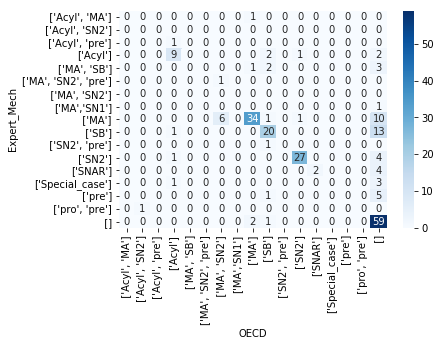

In [458]:
ax = sns.heatmap(cmemtbx_df, annot = True, yticklabels = True, xticklabels = True, cmap = 'Blues')
ax.set_ylabel("Expert_Mech")
ax.set_xlabel('OECD')

In [466]:
cm_em_dow = confusion_matrix(jrc_all['Expert_Mech'],jrc_all['Dow'])

In [460]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['Dow']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       1.00      1.00      1.00         1
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.75      0.43      0.55        14
        ['MA', 'SB']       0.14      0.17      0.15         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.95      0.38      0.55        52
              ['SB']       0.74      0.68      0.71        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       0.93      0.81      0.87        32
            ['SNAR']       1.00      0.50      0.67         6
    ['Special_case']       0.00      0.00      0.00         4
             ['pre']       0.00      0.00      0.00         6
      ['pro', 'pre']       0.00      0.00      0.00         1
                  []       0.46      0.92      0.62        62

      

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [461]:
rep_em_dow = classification_report(jrc_all['Expert_Mech'],jrc_all['Dow'])

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [462]:
report_data = []
lines = rep_em_dow.split('\n')
for line in lines[2:-3]:
    row = {}
    row_data = line.split("    ")
    row_data = list(filter(None,row_data))
    row['class'] = row_data[0]
    row['precision'] = float(row_data[1])
    row['recall'] = float(row_data[2])
    row['f1_score'] = float(row_data[3])
    row['support'] = float(row_data[4])
    report_data.append(row)
em_dow = pd.DataFrame.from_dict(report_data)

In [465]:
em_dow.to_csv('em_dow.csv')

In [464]:
em_dow_cols = list(em_dow['class'])

In [468]:
cmemdow_df = pd.DataFrame(cm_em_dow, index = em_dow_cols, columns = em_dow_cols)

In [469]:
cmemdow_df.to_csv('cmemdow.csv')

Text(0.5,14.0938,'Dow')

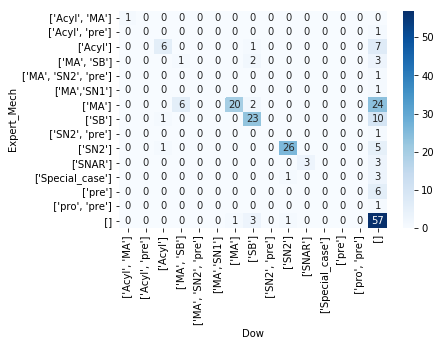

In [470]:
ax = sns.heatmap(cmemdow_df, annot = True, yticklabels = True, xticklabels = True, cmap = 'Blues')
ax.set_ylabel("Expert_Mech")
ax.set_xlabel('Dow')

In [477]:
from sklearn.metrics import matthews_corrcoef

In [478]:
matthews_corrcoef(jrc_all['Expert_Mech'],jrc_all['Enoch'],sample_weight=None)

0.6625442164024404

In [479]:
matthews_corrcoef(jrc_all['Expert_Mech'],jrc_all['OECD'],sample_weight=None)

0.6120438438395858

In [480]:
matthews_corrcoef(jrc_all['Expert_Mech'],jrc_all['Dow'],sample_weight=None)

0.5468332759549412

In [473]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['Dow']))


                      precision    recall  f1-score   support

      ['Acyl', 'MA']       1.00      1.00      1.00         1
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.75      0.43      0.55        14
        ['MA', 'SB']       0.14      0.17      0.15         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.95      0.38      0.55        52
              ['SB']       0.74      0.68      0.71        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       0.93      0.81      0.87        32
            ['SNAR']       1.00      0.50      0.67         6
    ['Special_case']       0.00      0.00      0.00         4
             ['pre']       0.00      0.00      0.00         6
      ['pro', 'pre']       0.00      0.00      0.00         1
                  []       0.46      0.92      0.62        62

      

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [474]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['OECD']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       0.00      0.00      0.00         1
     ['Acyl', 'SN2']       0.00      0.00      0.00         0
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.69      0.64      0.67        14
        ['MA', 'SB']       0.00      0.00      0.00         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
       ['MA', 'SN2']       0.00      0.00      0.00         0
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.89      0.65      0.76        52
              ['SB']       0.71      0.59      0.65        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       0.93      0.84      0.89        32
            ['SNAR']       1.00      0.33      0.50         6
    ['Special_case']       0.00      0.00      0.00         4
             ['pre']       0.00      0.00      0.00         6
      [

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [475]:
print(classification_report(jrc_all['Expert_Mech'],jrc_all['Enoch']))

                      precision    recall  f1-score   support

      ['Acyl', 'MA']       0.00      0.00      0.00         1
     ['Acyl', 'pre']       0.00      0.00      0.00         1
            ['Acyl']       0.61      0.79      0.69        14
      ['MA', 'Acyl']       0.00      0.00      0.00         0
        ['MA', 'SB']       0.25      0.17      0.20         6
['MA', 'SN2', 'pre']       0.00      0.00      0.00         1
       ['MA', 'SN2']       0.00      0.00      0.00         0
        ['MA','SN1']       0.00      0.00      0.00         1
              ['MA']       0.88      0.83      0.85        52
      ['SB', 'Acyl']       0.00      0.00      0.00         0
              ['SB']       0.76      0.76      0.76        34
      ['SN2', 'pre']       0.00      0.00      0.00         1
             ['SN2']       1.00      0.62      0.77        32
    ['SNAR', 'Acyl']       0.00      0.00      0.00         0
            ['SNAR']       1.00      1.00      1.00         6
    ['S

/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [481]:
jrc_all.head()

,DTXSID,CASRN,SMILES,reaction_chemistry_domain,Expert_Mech,OECD,Enoch,Dow,LLNA,DPRA,KeratinoSens,hCLAT
0,DTXSID1031626,1896-62-4,CC(=O)\C=C\C1=CC=CC=C1,MA,['MA'],"['MA', 'SN2']",['MA'],['MA'],1,1.0,1,1.0
1,DTXSID4051879,2277-19-2,CC\C=C/CCCCC=O,SB,['SB'],['SB'],['SB'],['SB'],1,0.0,1,NaN
2,DTXSID00231670,82297-64-1,CCC(=O)\C=C\C1=CC=C(OC)C=C1,MA,['MA'],"['MA', 'SN2']",['MA'],['MA'],1,1.0,1,NaN
3,DTXSID7049398,116-26-7,CC1=C(C=O)C(C)(C)CC=C1,MA,['MA'],[],"['MA', 'SB']",['SB'],1,1.0,1,NaN
4,DTXSID7026235,552-30-7,OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1,Acyl,['Acyl'],['Acyl'],['Acyl'],['Acyl'],1,1.0,0,1.0


In [482]:
jrc_mini = jrc_all.iloc[0:5,4:8]

In [483]:
jrc_mini

,Expert_Mech,OECD,Enoch,Dow
0,['MA'],"['MA', 'SN2']",['MA'],['MA']
1,['SB'],['SB'],['SB'],['SB']
2,['MA'],"['MA', 'SN2']",['MA'],['MA']
3,['MA'],[],"['MA', 'SB']",['SB']
4,['Acyl'],['Acyl'],['Acyl'],['Acyl']


In [486]:
jrc_mini[(jrc_mini['Dow'] == jrc_mini['OECD']) & (jrc_mini['OECD'] == jrc_mini['Enoch']) & (jrc_mini['Expert_Mech'] == jrc_mini['Dow'])]
    

,Expert_Mech,OECD,Enoch,Dow
1,['SB'],['SB'],['SB'],['SB']
4,['Acyl'],['Acyl'],['Acyl'],['Acyl']


In [487]:
jrc_mini[(jrc_mini['Dow'] == jrc_mini['OECD']) & (jrc_mini['OECD'] == jrc_mini['Enoch']) & (jrc_mini['Expert_Mech'] != jrc_mini['Dow'])]

,Expert_Mech,OECD,Enoch,Dow


In [485]:
jrc_mini[jrc_mini.apply(lambda x: x['Expert_Mech'] in x['OECD'], axis=1)]

,Expert_Mech,OECD,Enoch,Dow
1,['SB'],['SB'],['SB'],['SB']
4,['Acyl'],['Acyl'],['Acyl'],['Acyl']


In [489]:
all_correct = jrc_all[(jrc_all['Dow'] == jrc_all['OECD']) & (jrc_all['OECD'] == jrc_all['Enoch']) & (jrc_all['Expert_Mech'] == jrc_all['Dow'])]

In [517]:
all_correct.to_csv('all_correct.csv')

In [491]:
len(jrc_all)

222

In [492]:
all_incorrect = jrc_all[(jrc_all['Dow'] == jrc_all['OECD']) & (jrc_all['OECD'] == jrc_all['Enoch']) & (jrc_all['Expert_Mech'] != jrc_all['Dow'])]

In [503]:
all_incorrect


,DTXSID,CASRN,SMILES,reaction_chemistry_domain,Expert_Mech,OECD,Enoch,Dow,LLNA,DPRA,KeratinoSens,hCLAT
11,DTXSID3021803,93-91-4,CC(=O)CC(=O)C1=CC=CC=C1,Acyl,['Acyl'],['SB'],['SB'],['SB'],1,NaN,NaN,1.0
22,DTXSID3029152,119-10-8,COC1=CC=C(C)C=C1[N+]([O-])=O,pro-MA,['MA'],[],[],[],0,NaN,1,1.0
28,DTXSID6021583,431-03-8,CC(=O)C(C)=O,SB_or_MA,"['MA', 'SB']",['SB'],['SB'],['SB'],1,1.0,1,1.0
48,DTXSID0049313,525-76-8,CC1=NC2=CC=CC=C2C(=O)O1,Acyl,['Acyl'],[],[],[],1,NaN,NaN,1.0
66,DTXSID9020295,106-47-8,NC1=CC=C(Cl)C=C1,pro/pre-MA_or_SB,"['MA', 'SB']",[],[],[],1,NaN,NaN,1.0
69,DTXSID2044347,100-06-1,COC1=CC=C(C=C1)C(C)=O,non-reactive_SB,['SB'],[],[],[],0,0.0,1,0.0
79,DTXSID7022047,514-10-3,CC(C)C1=CC2=CC[C@@H]3[C@](C)(CCC[C@@]3(C)C(O)=...,pre,['pre'],[],[],[],1,1.0,1,0.0
81,DTXSID8020090,62-53-3,NC1=CC=CC=C1,pre/pro-MA_or_pseudo_SB,"['MA', 'SB']",[],[],[],1,0.0,0,1.0
82,DTXSID6044357,105-13-5,COC1=CC=C(CO)C=C1,pro/pre-MA,['MA'],[],[],[],1,NaN,NaN,NaN
86,DTXSID8021804,94-09-7,CCOC(=O)C1=CC=C(N)C=C1,pro/pre-SB,['SB'],[],[],[],0,1.0,1,1.0


In [495]:
all_incorrect.to_csv('all_incorrect.csv')

In [509]:
#all_incorrect.groupby('Expert_Mech').count()

In [505]:
mols = [Chem.MolFromSmiles(element)for element in all_incorrect['SMILES']]

In [529]:
all_incorrect


,DTXSID,CASRN,SMILES,reaction_chemistry_domain,Expert_Mech,OECD,Enoch,Dow,LLNA,DPRA,KeratinoSens,hCLAT
11,DTXSID3021803,93-91-4,CC(=O)CC(=O)C1=CC=CC=C1,Acyl,['Acyl'],['SB'],['SB'],['SB'],1,NaN,NaN,1.0
22,DTXSID3029152,119-10-8,COC1=CC=C(C)C=C1[N+]([O-])=O,pro-MA,['MA'],[],[],[],0,NaN,1,1.0
28,DTXSID6021583,431-03-8,CC(=O)C(C)=O,SB_or_MA,"['MA', 'SB']",['SB'],['SB'],['SB'],1,1.0,1,1.0
48,DTXSID0049313,525-76-8,CC1=NC2=CC=CC=C2C(=O)O1,Acyl,['Acyl'],[],[],[],1,NaN,NaN,1.0
66,DTXSID9020295,106-47-8,NC1=CC=C(Cl)C=C1,pro/pre-MA_or_SB,"['MA', 'SB']",[],[],[],1,NaN,NaN,1.0
69,DTXSID2044347,100-06-1,COC1=CC=C(C=C1)C(C)=O,non-reactive_SB,['SB'],[],[],[],0,0.0,1,0.0
79,DTXSID7022047,514-10-3,CC(C)C1=CC2=CC[C@@H]3[C@](C)(CCC[C@@]3(C)C(O)=...,pre,['pre'],[],[],[],1,1.0,1,0.0
81,DTXSID8020090,62-53-3,NC1=CC=CC=C1,pre/pro-MA_or_pseudo_SB,"['MA', 'SB']",[],[],[],1,0.0,0,1.0
82,DTXSID6044357,105-13-5,COC1=CC=C(CO)C=C1,pro/pre-MA,['MA'],[],[],[],1,NaN,NaN,NaN
86,DTXSID8021804,94-09-7,CCOC(=O)C1=CC=C(N)C=C1,pro/pre-SB,['SB'],[],[],[],0,1.0,1,1.0


In [532]:
print(classification_report(jrc_all['Enoch'],jrc_all['Dow']))

                  precision    recall  f1-score   support

  ['Acyl', 'MA']       0.00      0.00      0.00         0
        ['Acyl']       0.75      0.33      0.46        18
  ['MA', 'Acyl']       0.00      0.00      0.00         1
    ['MA', 'SB']       0.00      0.00      0.00         4
   ['MA', 'SN2']       0.00      0.00      0.00         1
          ['MA']       0.90      0.39      0.54        49
  ['SB', 'Acyl']       0.00      0.00      0.00         1
          ['SB']       0.81      0.74      0.77        34
         ['SN2']       0.64      0.90      0.75        20
['SNAR', 'Acyl']       0.00      0.00      0.00         1
        ['SNAR']       1.00      0.50      0.67         6
              []       0.63      0.90      0.74        87

     avg / total       0.72      0.67      0.65       222



/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [534]:
print(confusion_matrix(jrc_all['Enoch'],jrc_all['Dow']))

[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  3  0  0  9]
 [ 0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  1  0  3  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  6  0 19  0  0  2  0  0 21]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0 25  0  0  0  8]
 [ 0  0  0  0  0  0  0  0 18  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  3  3]
 [ 0  0  0  1  0  0  0  3  5  0  0 78]]


In [535]:
matthews_corrcoef(jrc_all['Enoch'],jrc_all['Dow'],sample_weight=None)

0.5664713877866889

In [536]:
print(classification_report(jrc_all['Enoch'],jrc_all['OECD']))

                  precision    recall  f1-score   support

 ['Acyl', 'SN2']       0.00      0.00      0.00         0
        ['Acyl']       0.77      0.56      0.65        18
  ['MA', 'Acyl']       0.00      0.00      0.00         1
    ['MA', 'SB']       0.00      0.00      0.00         4
   ['MA', 'SN2']       0.14      1.00      0.25         1
          ['MA']       0.87      0.67      0.76        49
  ['SB', 'Acyl']       0.00      0.00      0.00         1
          ['SB']       0.86      0.71      0.77        34
         ['SN2']       0.62      0.90      0.73        20
['SNAR', 'Acyl']       0.00      0.00      0.00         1
        ['SNAR']       1.00      0.33      0.50         6
              []       0.75      0.90      0.82        87

     avg / total       0.76      0.75      0.74       222



/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [537]:
matthews_corrcoef(jrc_all['Enoch'],jrc_all['OECD'],sample_weight=None)

0.66621091406455

In [541]:
matthews_corrcoef(jrc_all['OECD'],jrc_all['Enoch'],sample_weight=None)

0.66621091406455

In [538]:
print(classification_report(jrc_all['Dow'],jrc_all['OECD']))

                 precision    recall  f1-score   support

 ['Acyl', 'MA']       0.00      0.00      0.00         1
['Acyl', 'SN2']       0.00      0.00      0.00         0
       ['Acyl']       0.62      1.00      0.76         8
   ['MA', 'SB']       0.00      0.00      0.00         7
  ['MA', 'SN2']       0.00      0.00      0.00         0
         ['MA']       0.42      0.76      0.54        21
         ['SB']       0.71      0.65      0.68        31
        ['SN2']       0.86      0.89      0.88        28
       ['SNAR']       1.00      0.67      0.80         3
             []       0.86      0.72      0.78       123

    avg / total       0.76      0.72      0.73       222



/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [540]:
print(classification_report(jrc_all['OECD'],jrc_all['Dow']))

                 precision    recall  f1-score   support

 ['Acyl', 'MA']       0.00      0.00      0.00         0
['Acyl', 'SN2']       0.00      0.00      0.00         1
       ['Acyl']       1.00      0.62      0.76        13
   ['MA', 'SB']       0.00      0.00      0.00         0
  ['MA', 'SN2']       0.00      0.00      0.00         7
         ['MA']       0.76      0.42      0.54        38
         ['SB']       0.65      0.71      0.68        28
        ['SN2']       0.89      0.86      0.88        29
       ['SNAR']       0.67      1.00      0.80         2
             []       0.72      0.86      0.78       104

    avg / total       0.73      0.72      0.71       222



/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gpatlewi/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [539]:
matthews_corrcoef(jrc_all['Dow'],jrc_all['OECD'],sample_weight=None)

0.6017398792235791

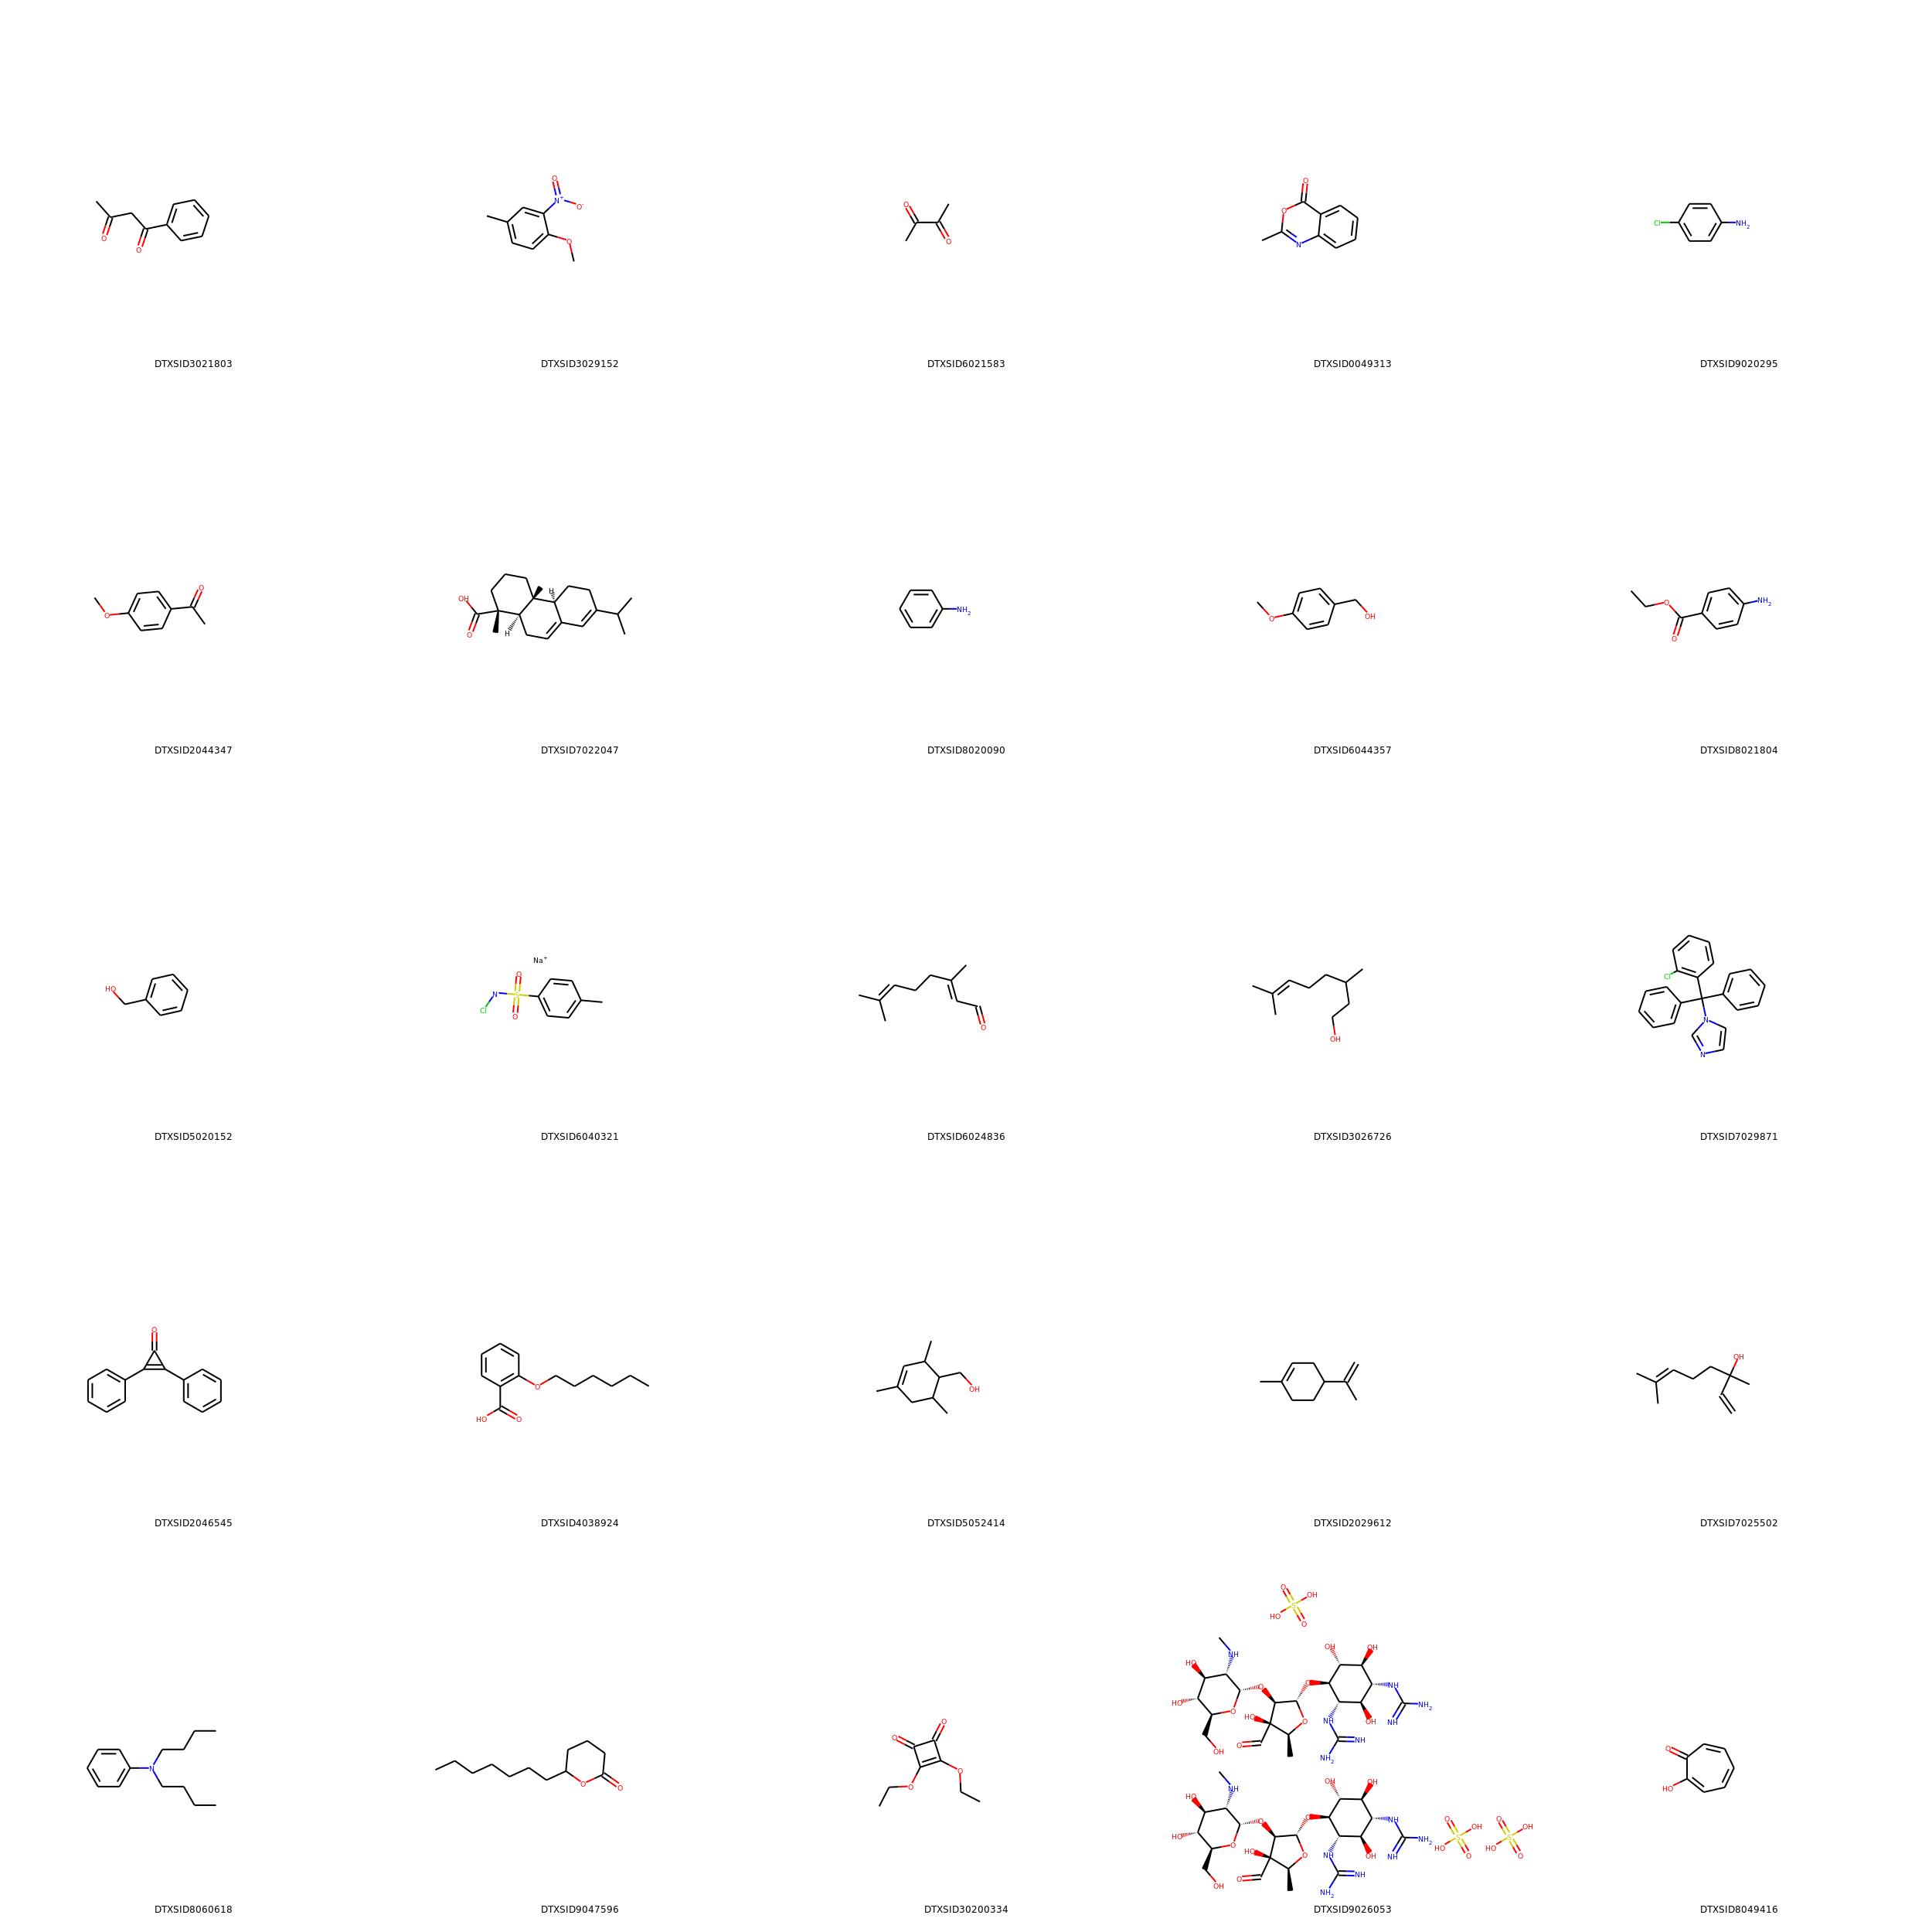

In [520]:
Chem.Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(500, 500), legends =[element for element in all_incorrect['DTXSID']])

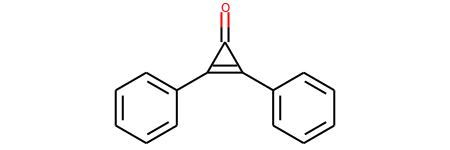

In [58]:
Chem.MolFromSmiles('O=C1C(=C1C1=CC=CC=C1)C1=CC=CC=C1')

In [544]:
jrc_all[(jrc_all['Dow'] == jrc_all['OECD'])]

,DTXSID,CASRN,SMILES,reaction_chemistry_domain,Expert_Mech,OECD,Enoch,Dow,LLNA,DPRA,KeratinoSens,hCLAT
1,DTXSID4051879,2277-19-2,CC\C=C/CCCCC=O,SB,['SB'],['SB'],['SB'],['SB'],1,0.0,1,NaN
4,DTXSID7026235,552-30-7,OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1,Acyl,['Acyl'],['Acyl'],['Acyl'],['Acyl'],1,1.0,0,1.0
5,DTXSID5032523,2634-33-5,O=C1NSC2=C1C=CC=C2,SN2,['SN2'],['SN2'],[],['SN2'],1,1.0,1,1.0
6,DTXSID8026515,85-42-7,O=C1OC(=O)C2CCCCC12,Acyl,['Acyl'],['Acyl'],['Acyl'],['Acyl'],1,1.0,0,NaN
8,DTXSID4021137,108-45-2,NC1=CC(N)=CC=C1,pre/pro-MA,['MA'],[],['MA'],[],1,NaN,1,NaN
10,DTXSID1049273,3344-77-2,OCCCCCCCCCCCCBr,SN2,['SN2'],['SN2'],['SN2'],['SN2'],1,NaN,NaN,0.0
11,DTXSID3021803,93-91-4,CC(=O)CC(=O)C1=CC=CC=C1,Acyl,['Acyl'],['SB'],['SB'],['SB'],1,NaN,NaN,1.0
12,DTXSID6021903,109-65-9,CCCCBr,SN2,['SN2'],['SN2'],['SN2'],['SN2'],0,1.0,0,1.0
13,DTXSID2044395,143-15-7,CCCCCCCCCCCCBr,SN2,['SN2'],['SN2'],['SN2'],['SN2'],1,NaN,1,NaN
14,DTXSID2049397,112-82-3,CCCCCCCCCCCCCCCCBr,SN2,['SN2'],['SN2'],['SN2'],['SN2'],1,1.0,NaN,NaN
